In [16]:
from google.colab.patches import cv2_imshow

In [17]:
import cv2
import numpy as np
image = cv2.imread('/content/extracted (2) (1).jpg')

In [18]:
image.shape

(2896, 2204, 3)

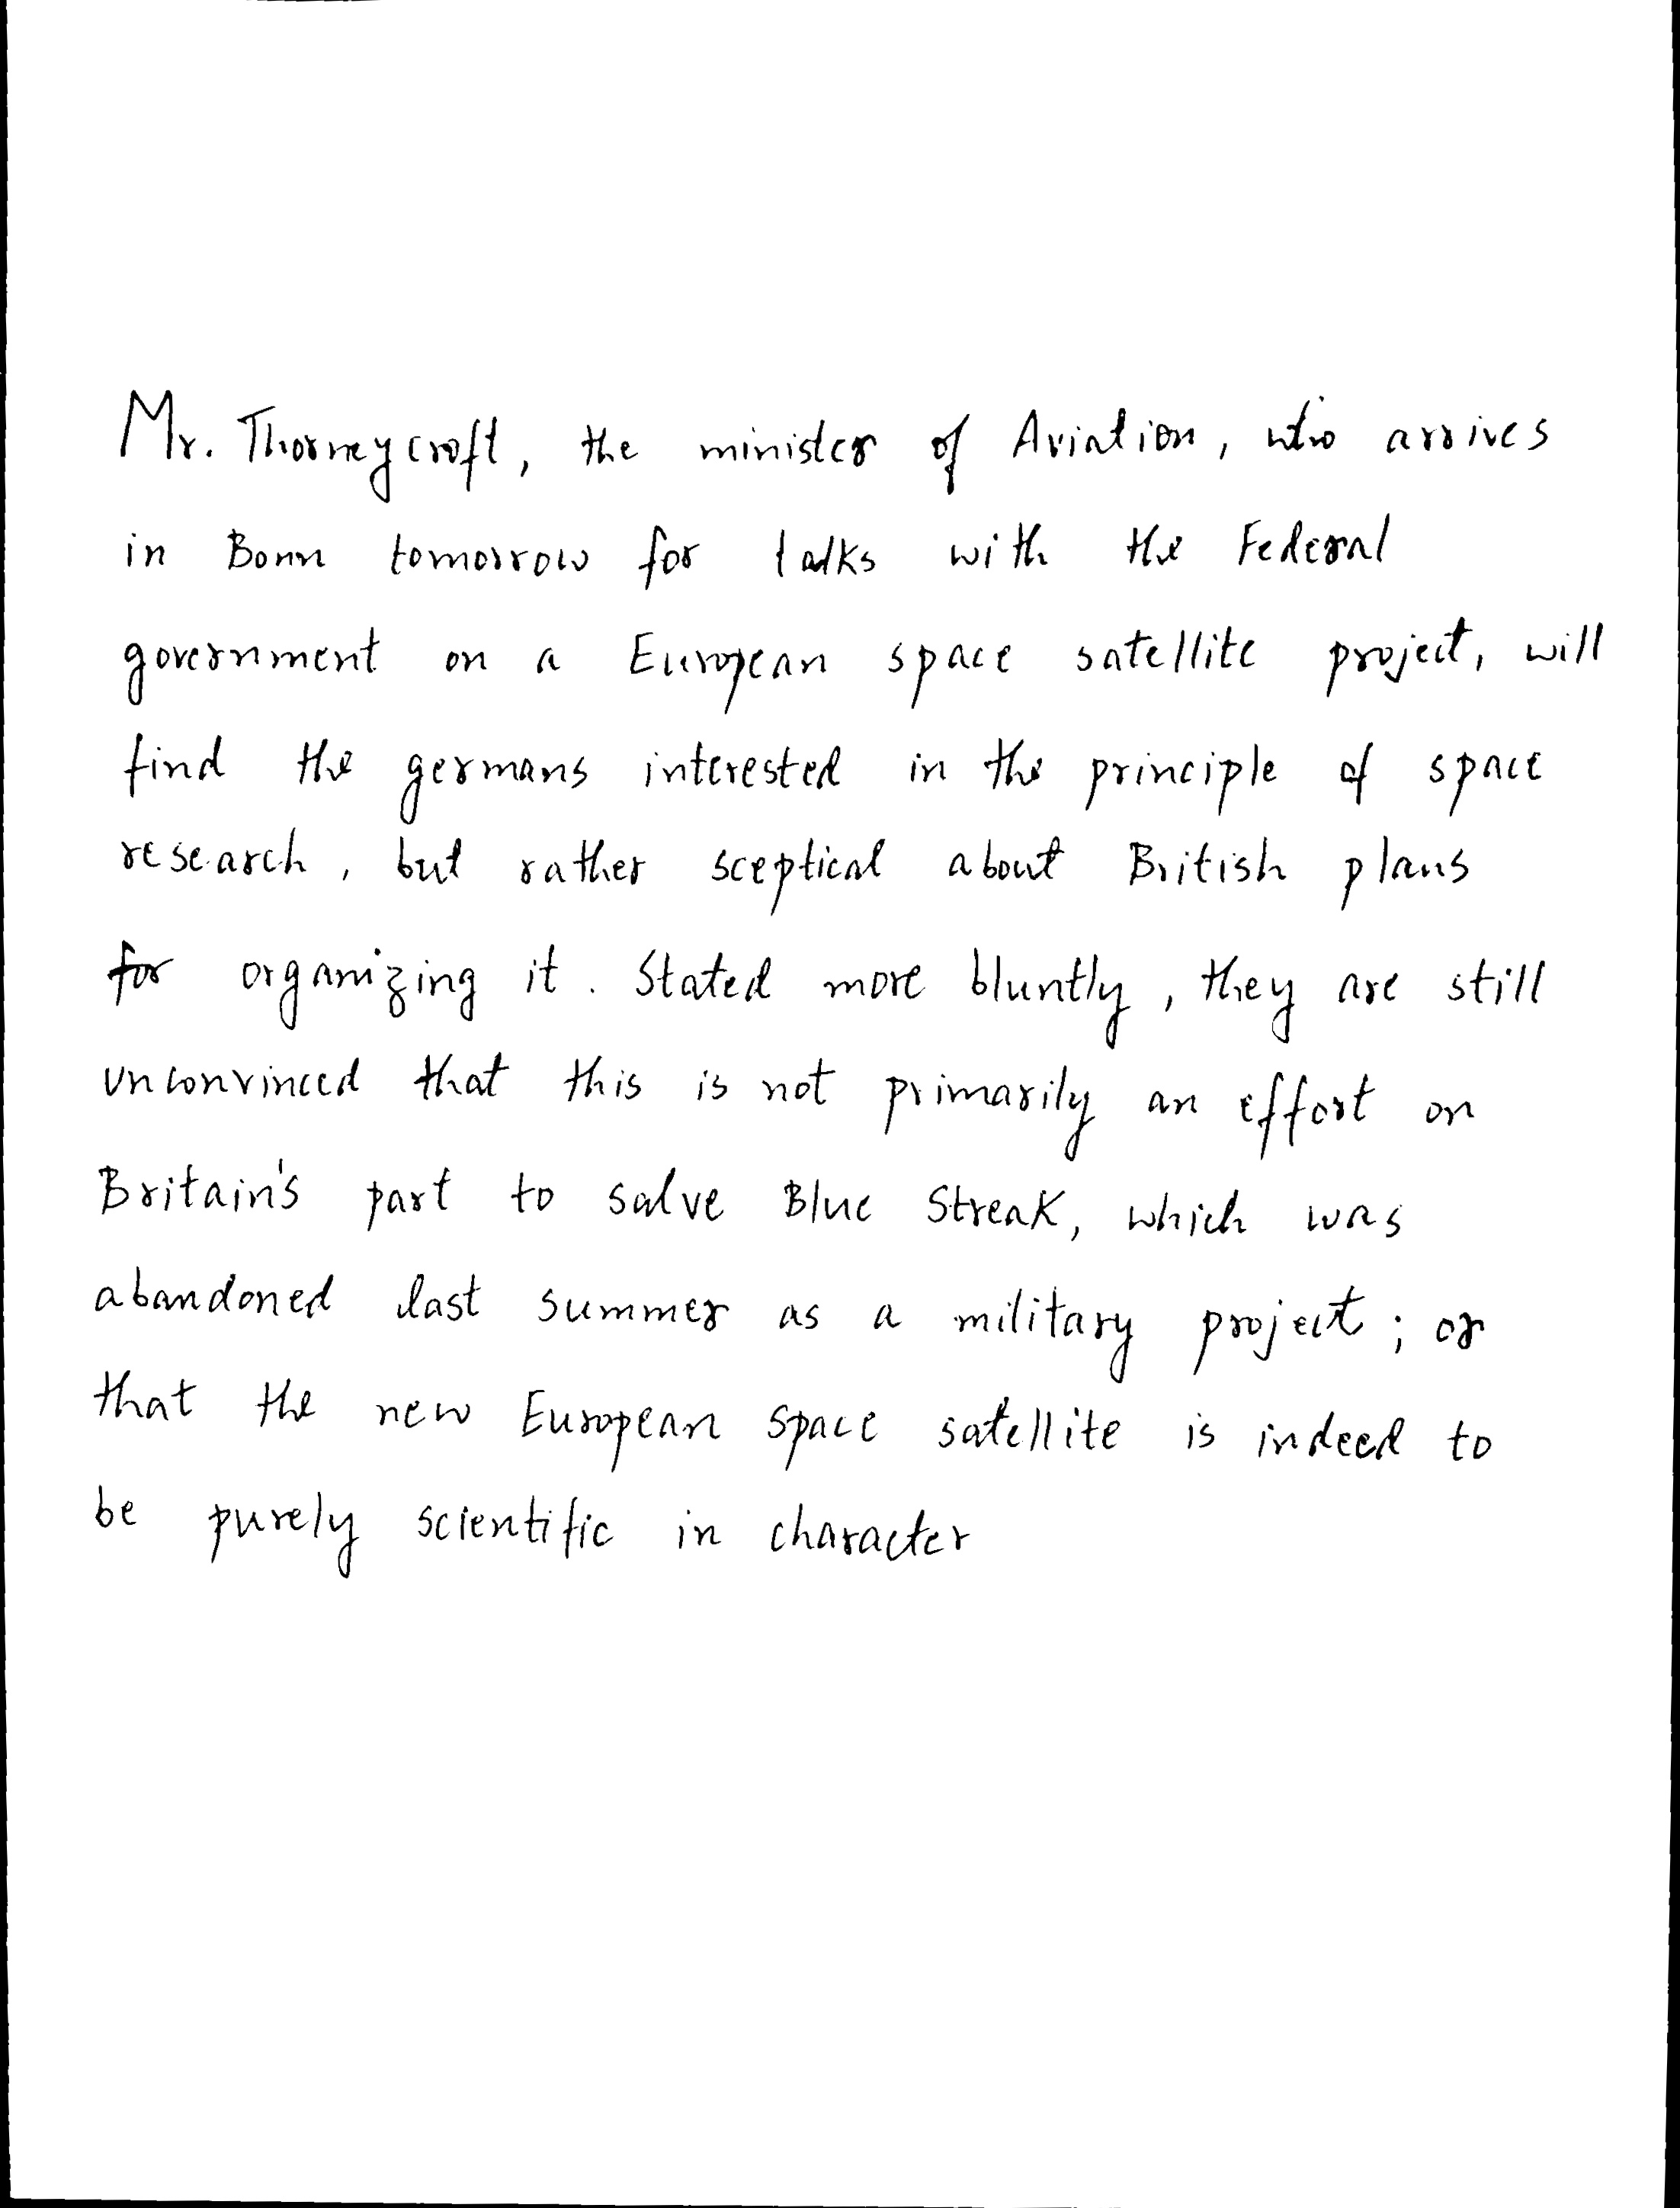

-1

In [19]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

In [20]:
gray.shape

(2896, 2204)

In [21]:
r_list_start = [i for i in range(0,20)]
r_list_start

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
r_list_end_h = [i for i in range(gray.shape[0]-15, gray.shape[0])]
r_list_end_h

[2881,
 2882,
 2883,
 2884,
 2885,
 2886,
 2887,
 2888,
 2889,
 2890,
 2891,
 2892,
 2893,
 2894,
 2895]

In [23]:
r_list_end_w = [i for i in range(gray.shape[1]-15, gray.shape[1])]
r_list_end_w

[2189,
 2190,
 2191,
 2192,
 2193,
 2194,
 2195,
 2196,
 2197,
 2198,
 2199,
 2200,
 2201,
 2202,
 2203]

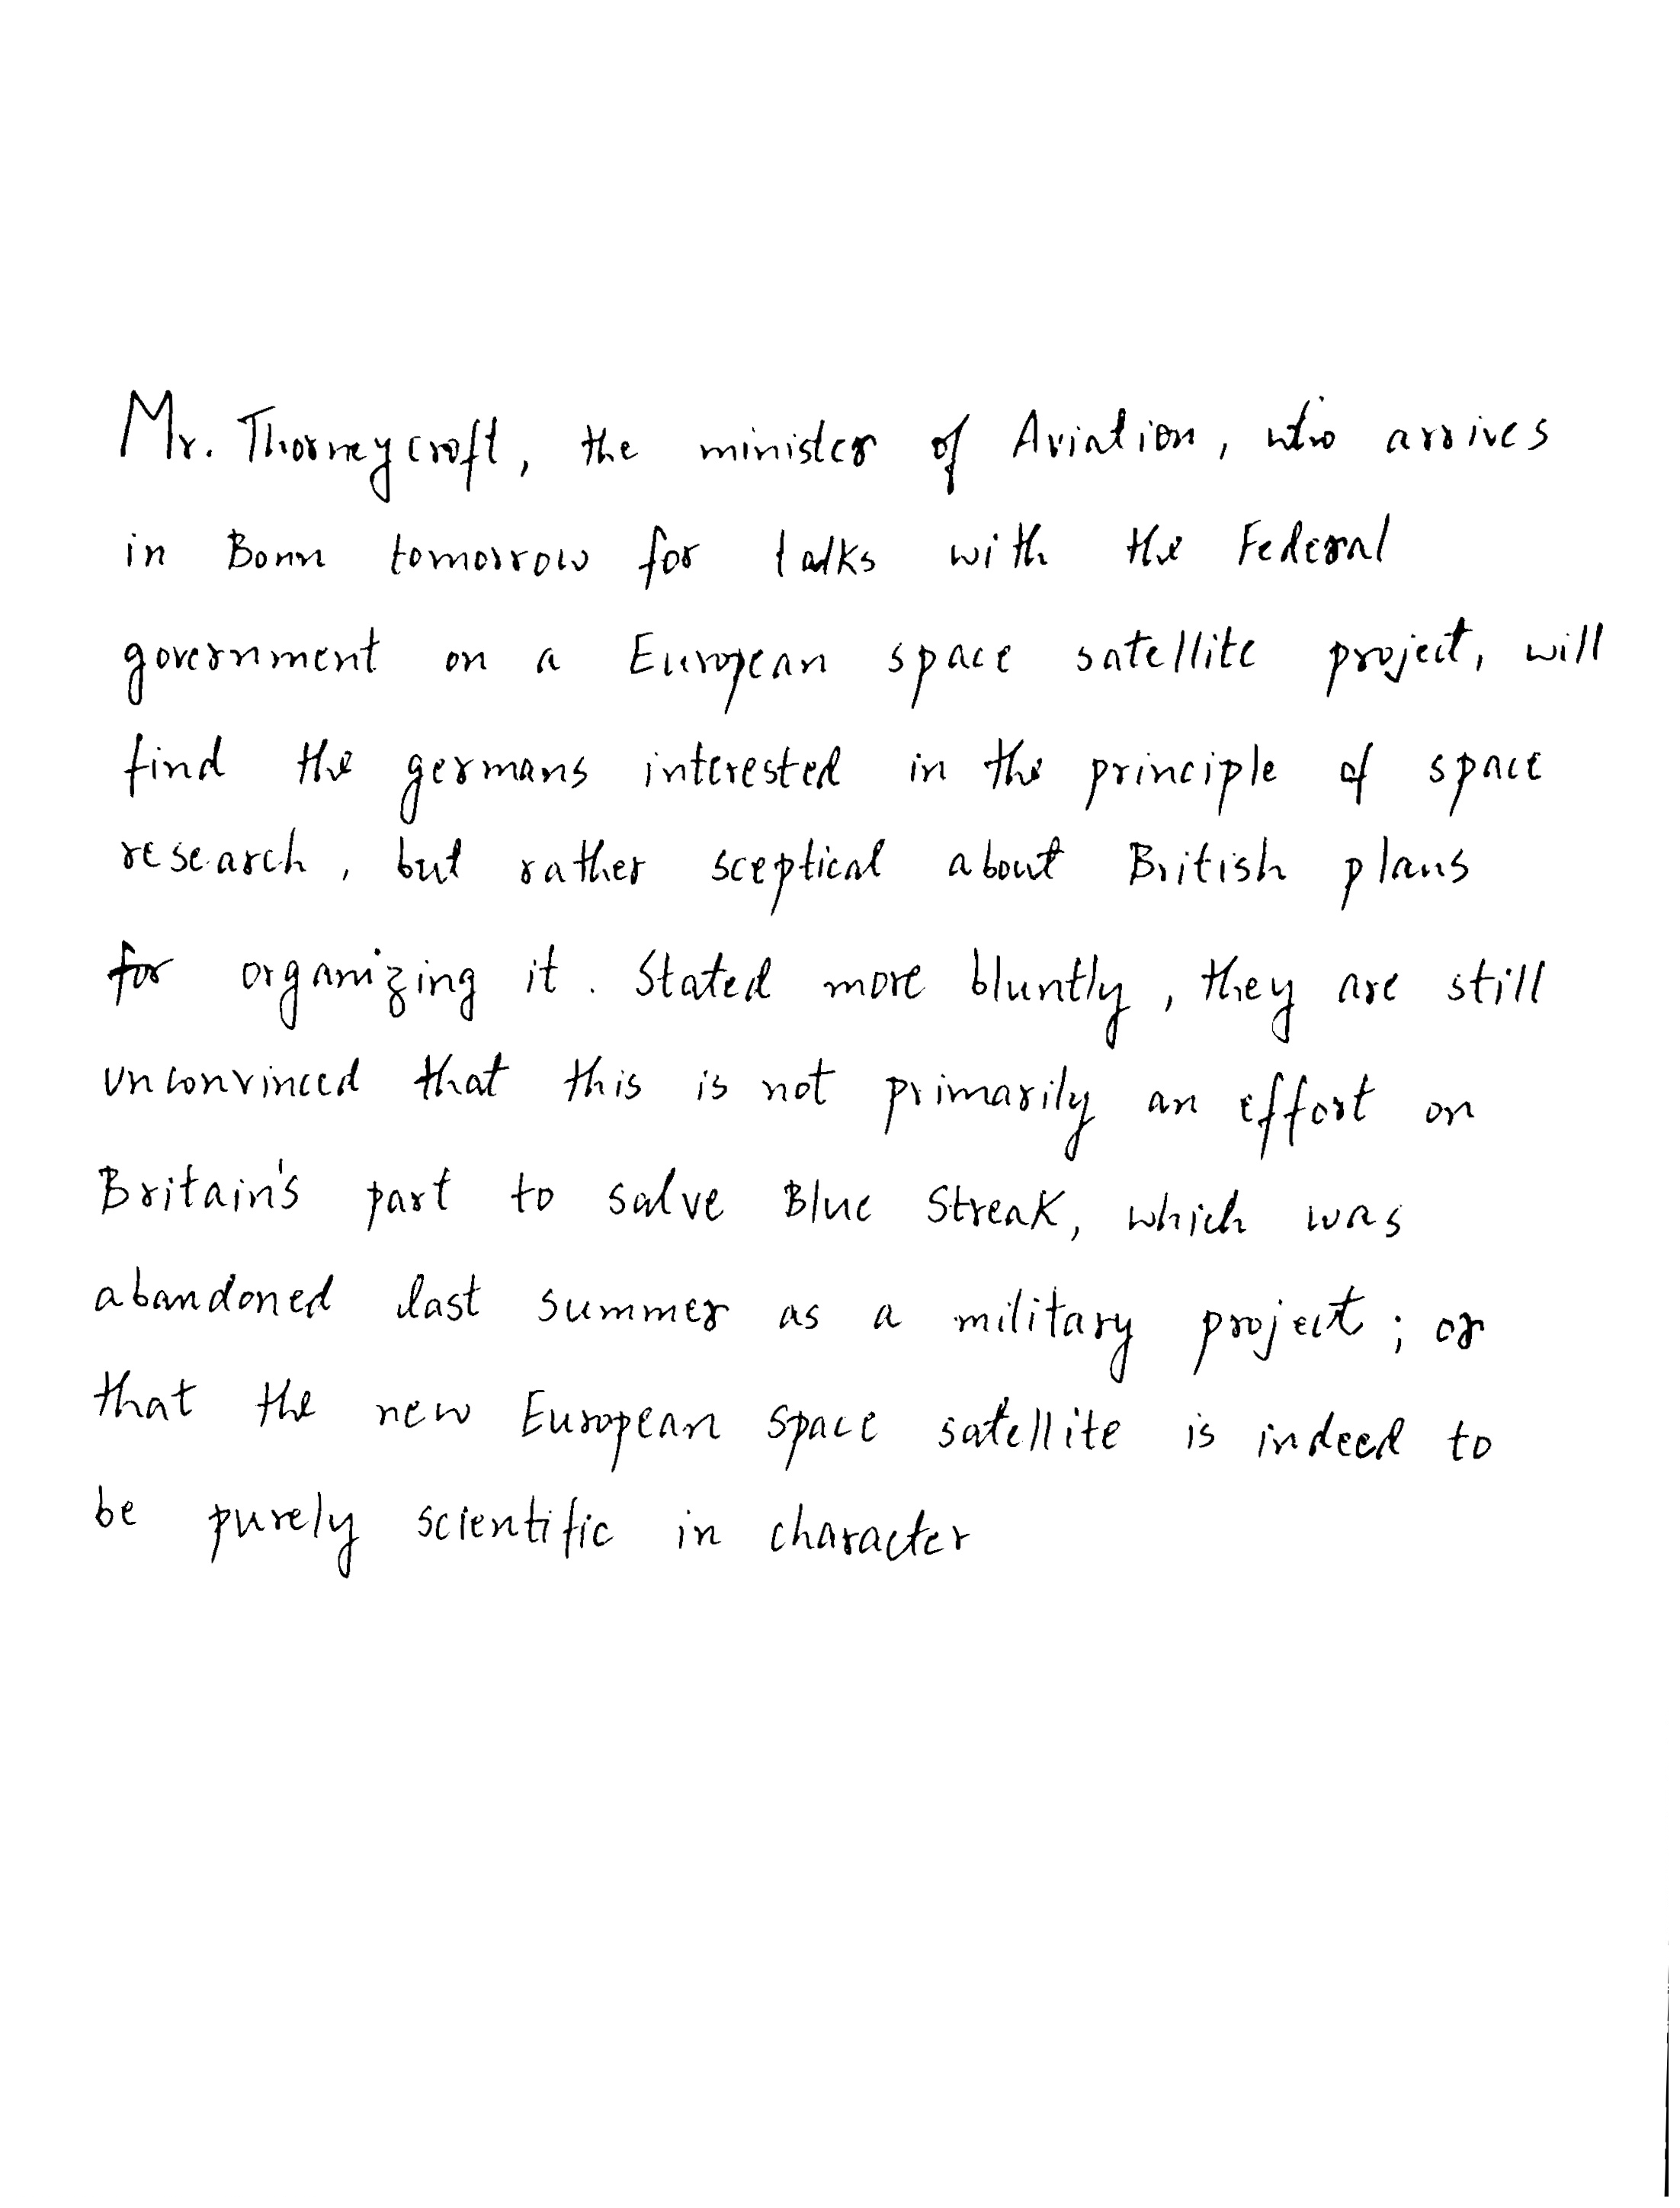

-1

In [24]:
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if i in r_list_start or j in r_list_start or i in r_list_end_h or j in r_list_end_w:
            gray[i][j] = 255

cv2_imshow(gray)
cv2.waitKey(0)            

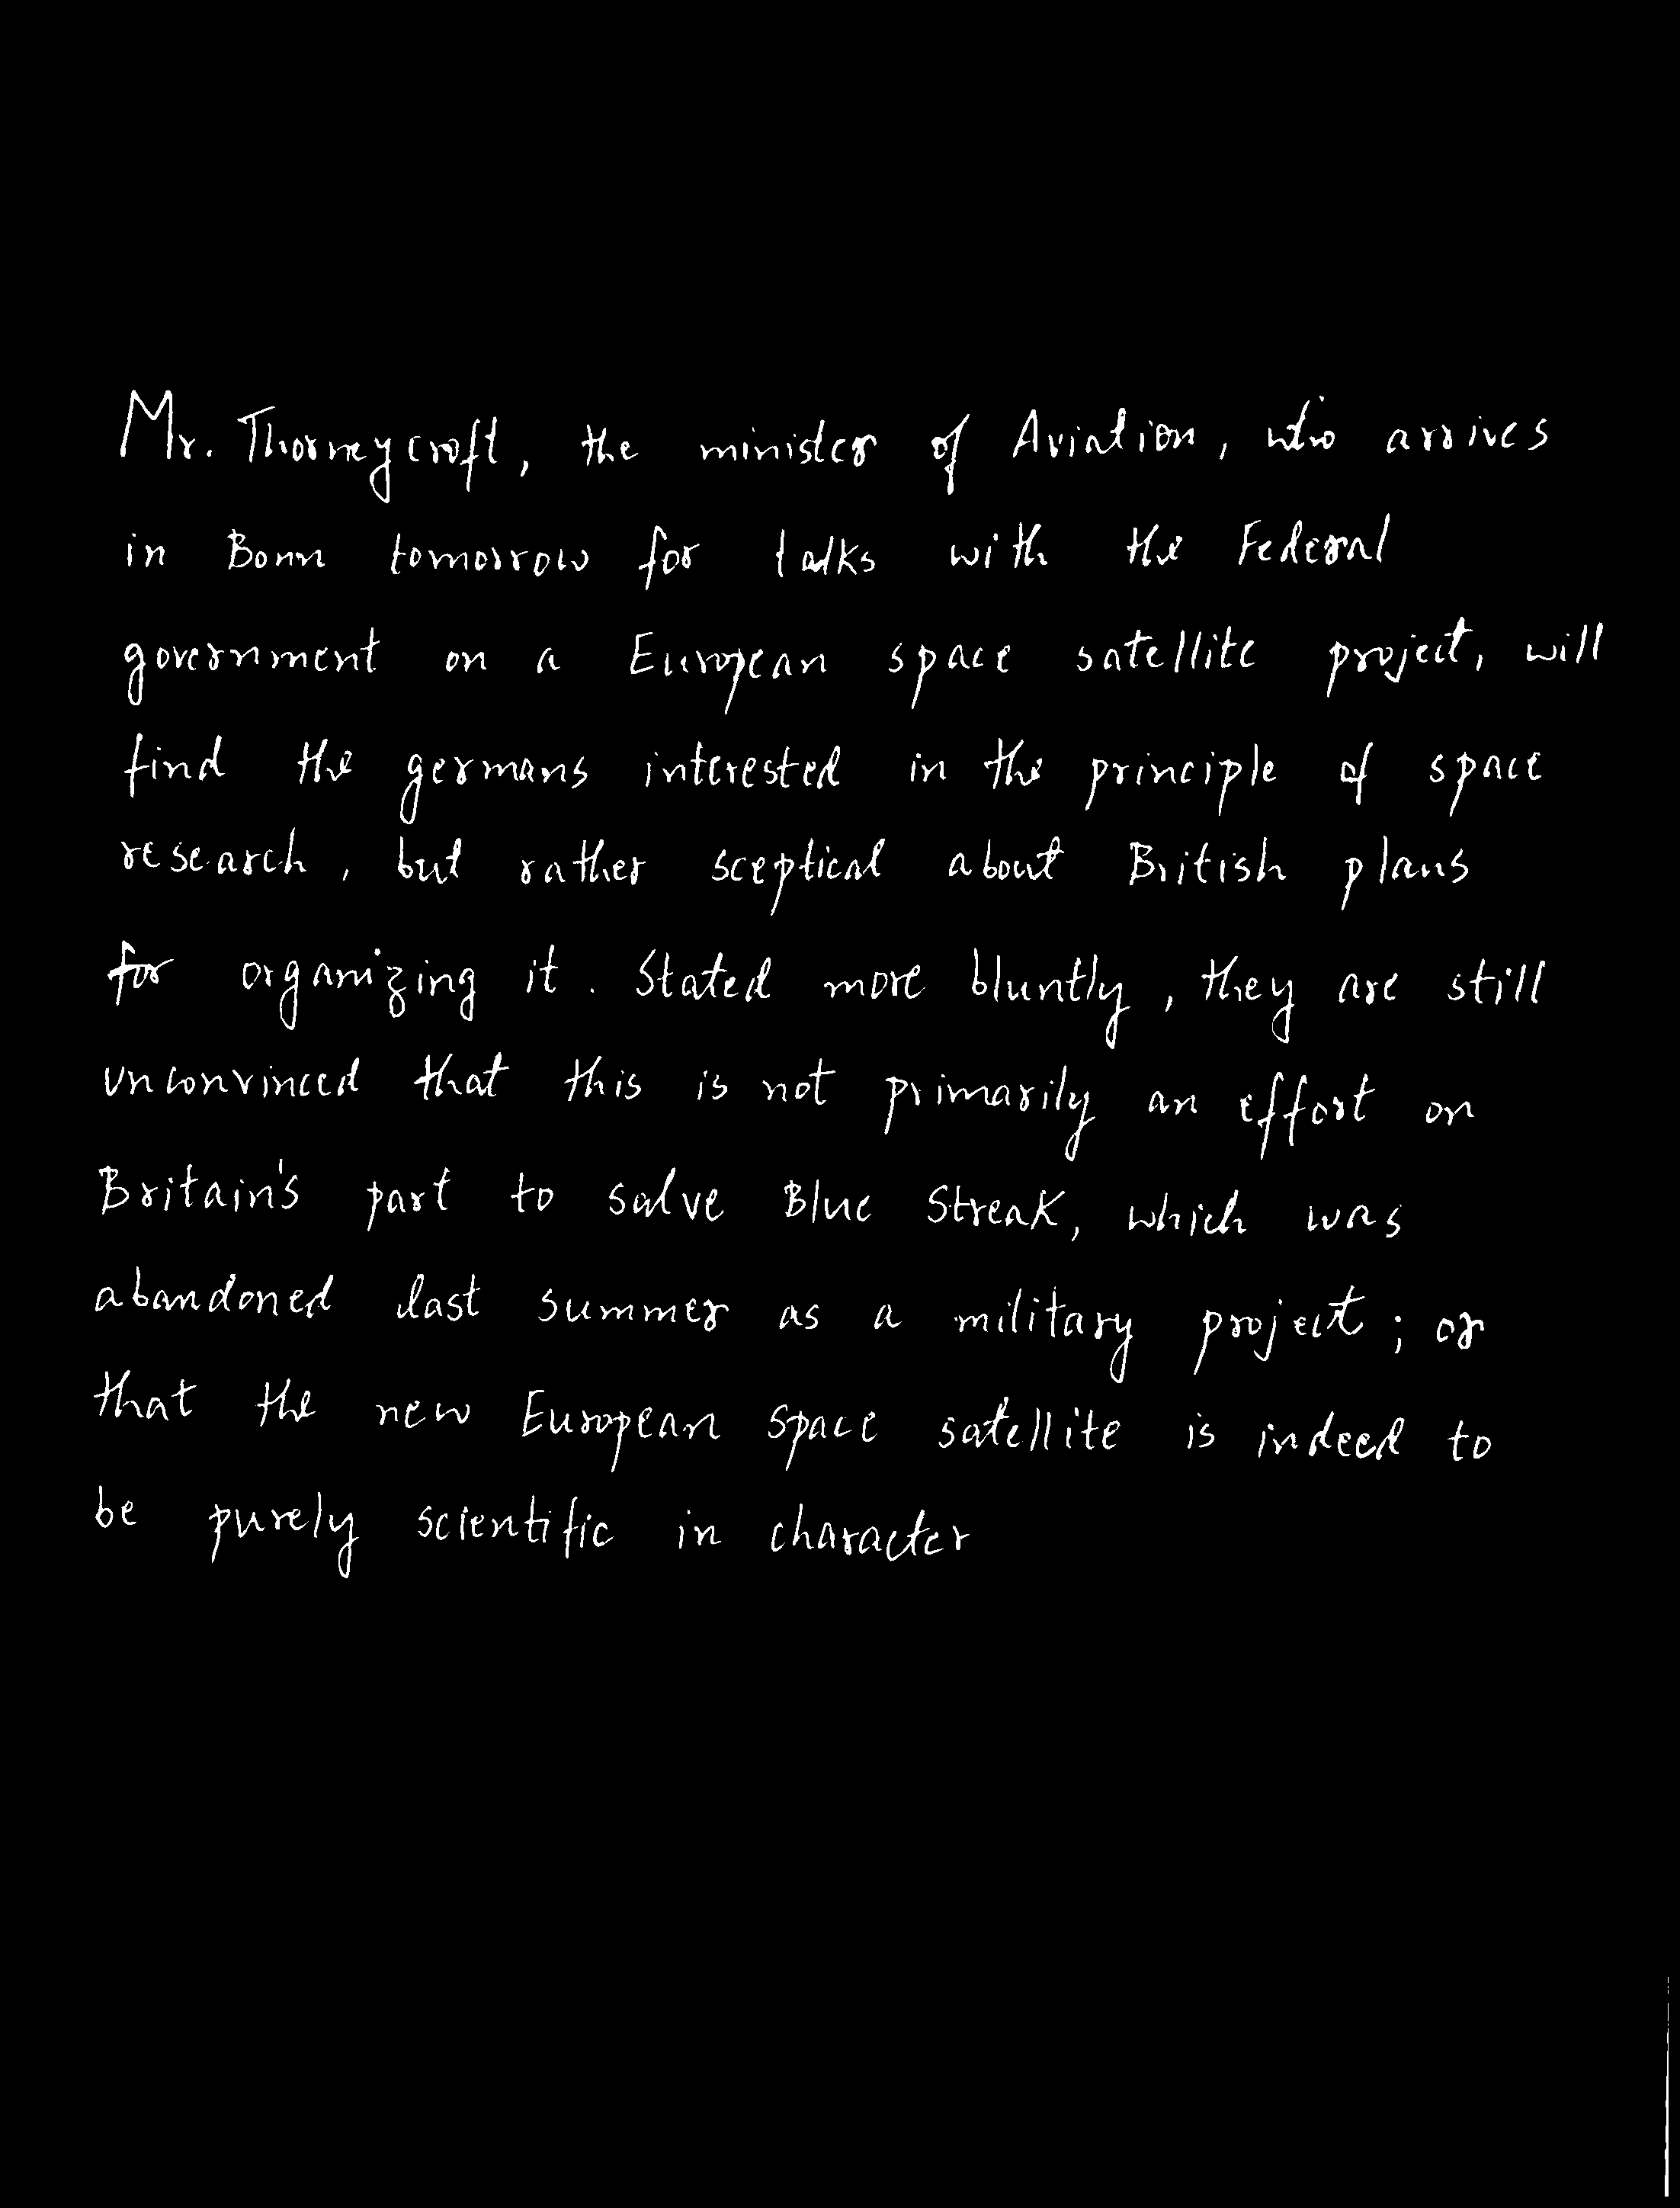

True

In [25]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.imwrite('/content/thresholded_inv.jpg', thresh)

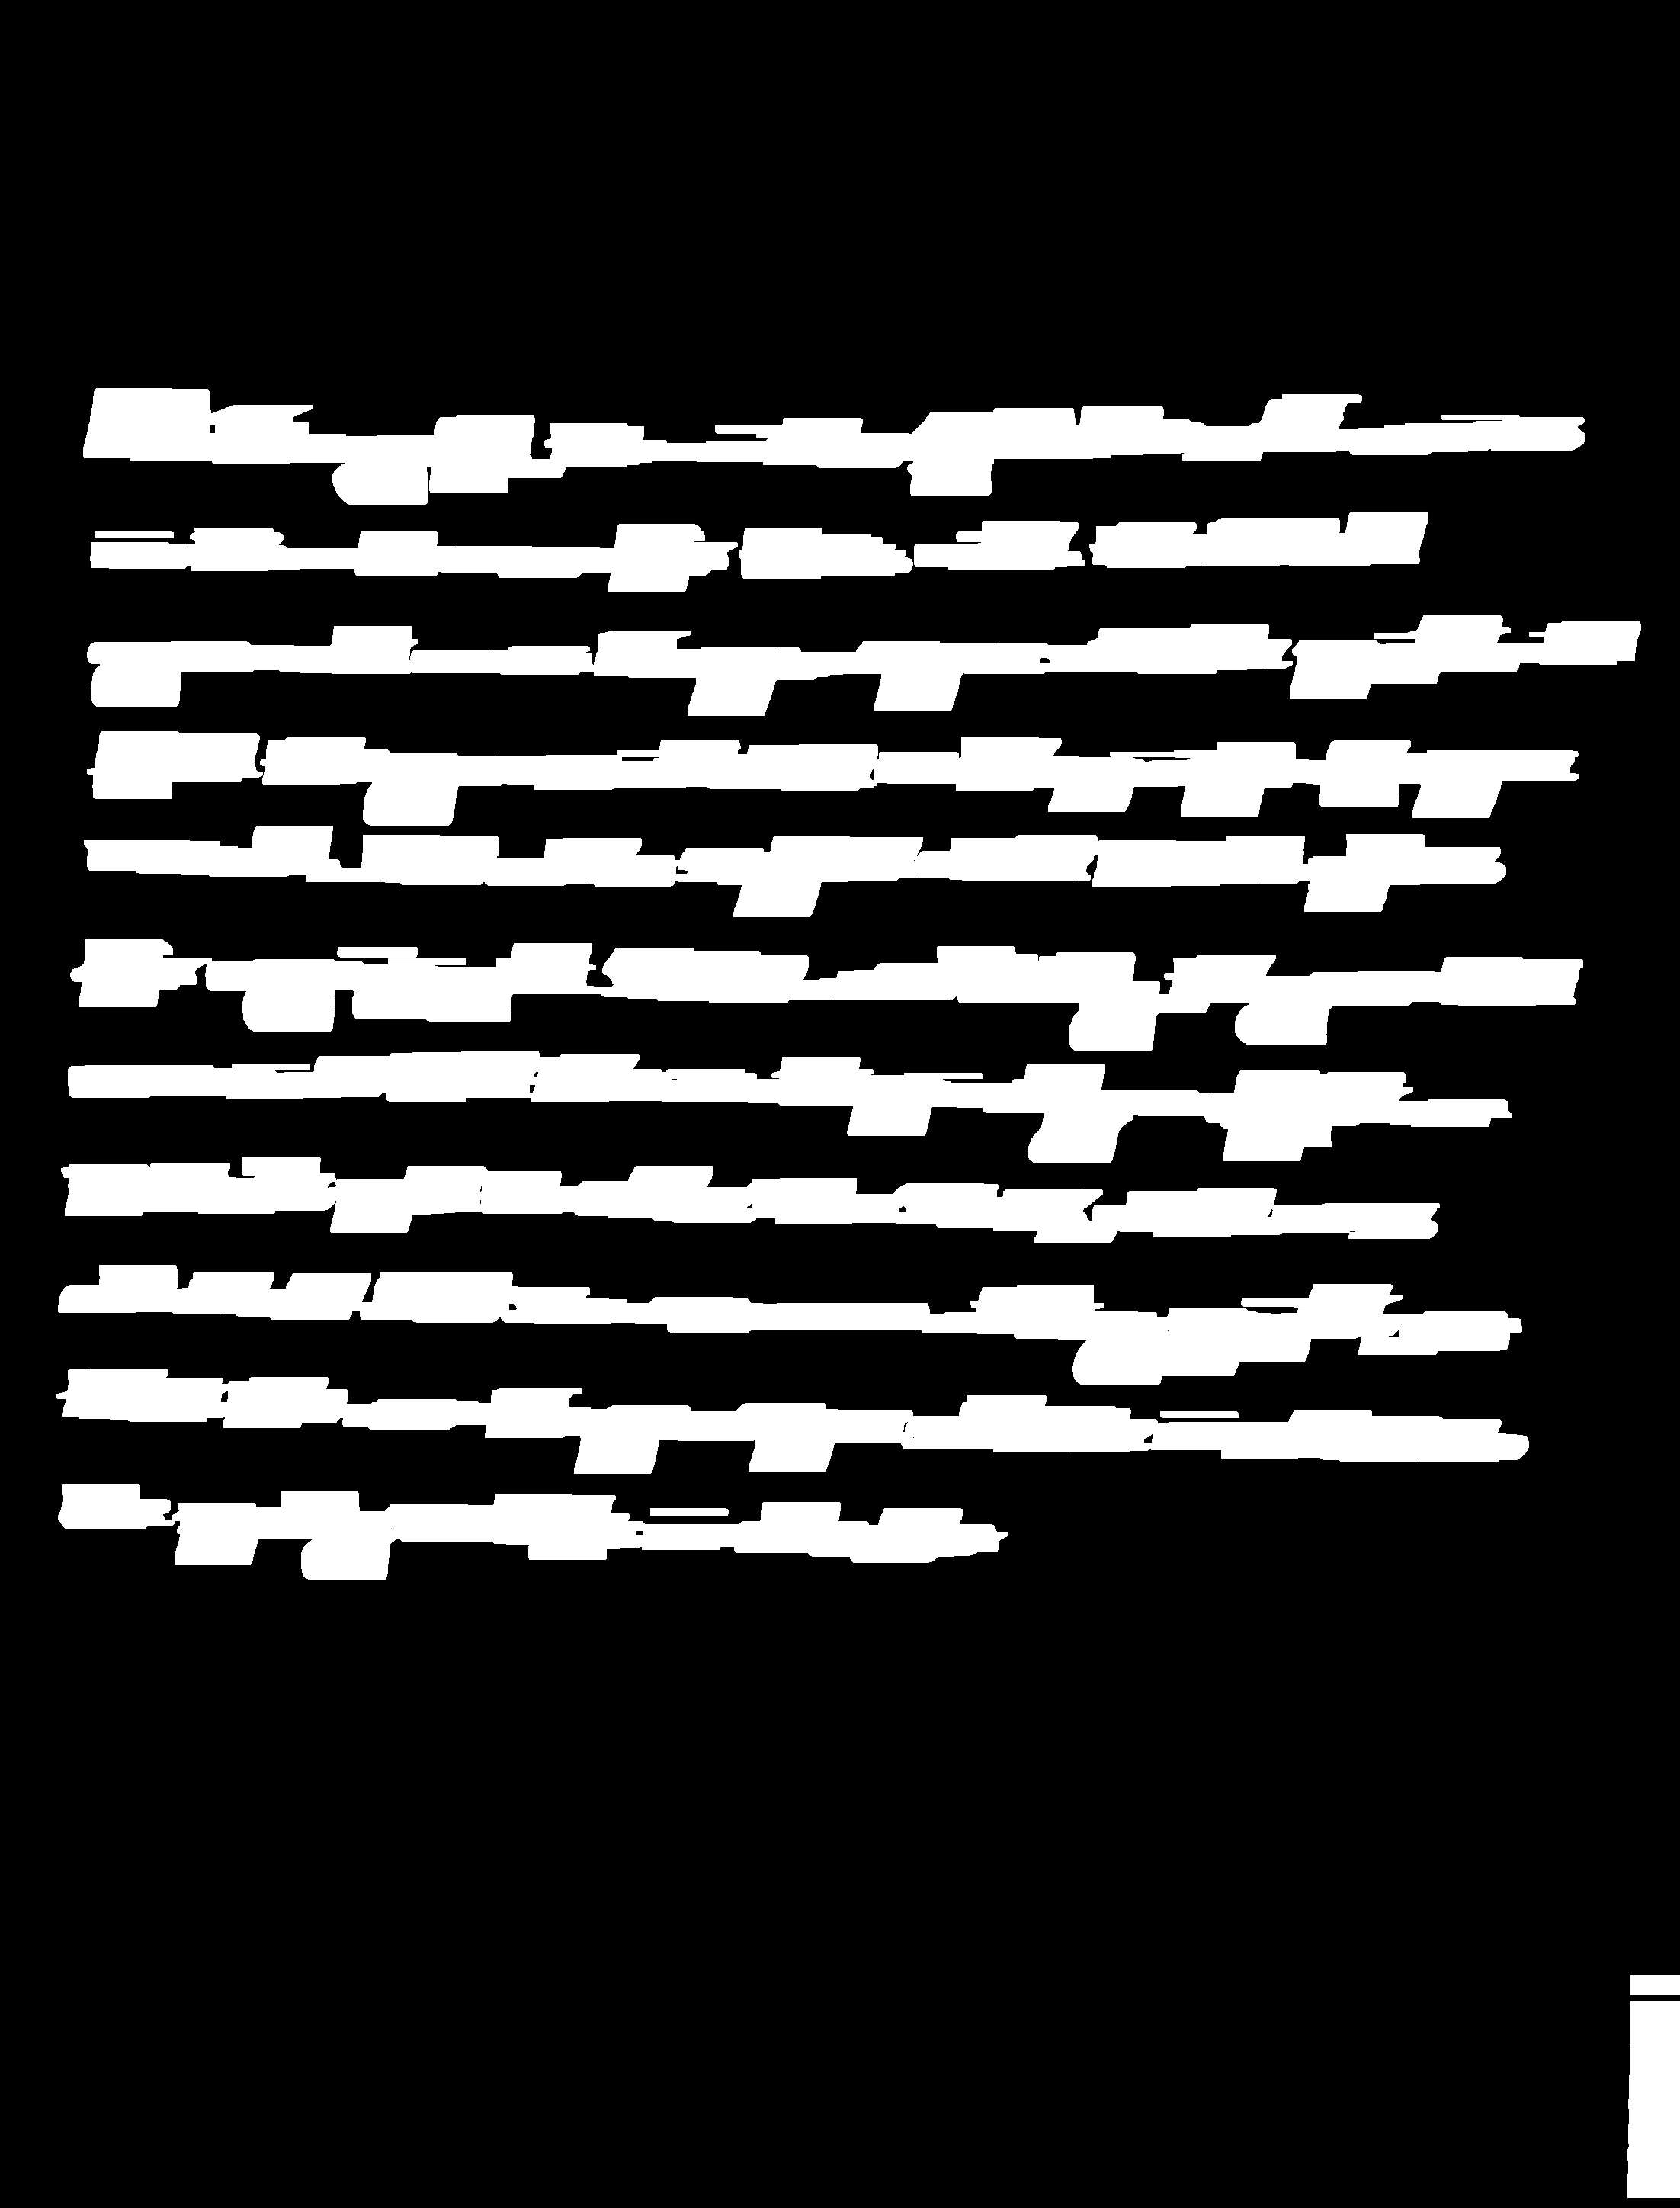

True

In [26]:
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)
cv2.waitKey(0)
cv2.imwrite('/content/dilation_inv.jpg', img_dilation)

In [27]:
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [28]:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [29]:
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)

    roi = image[y:y+h, x:x+w]
    cv2.imwrite("segment_no_"+str(i)+".png",roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(0) 

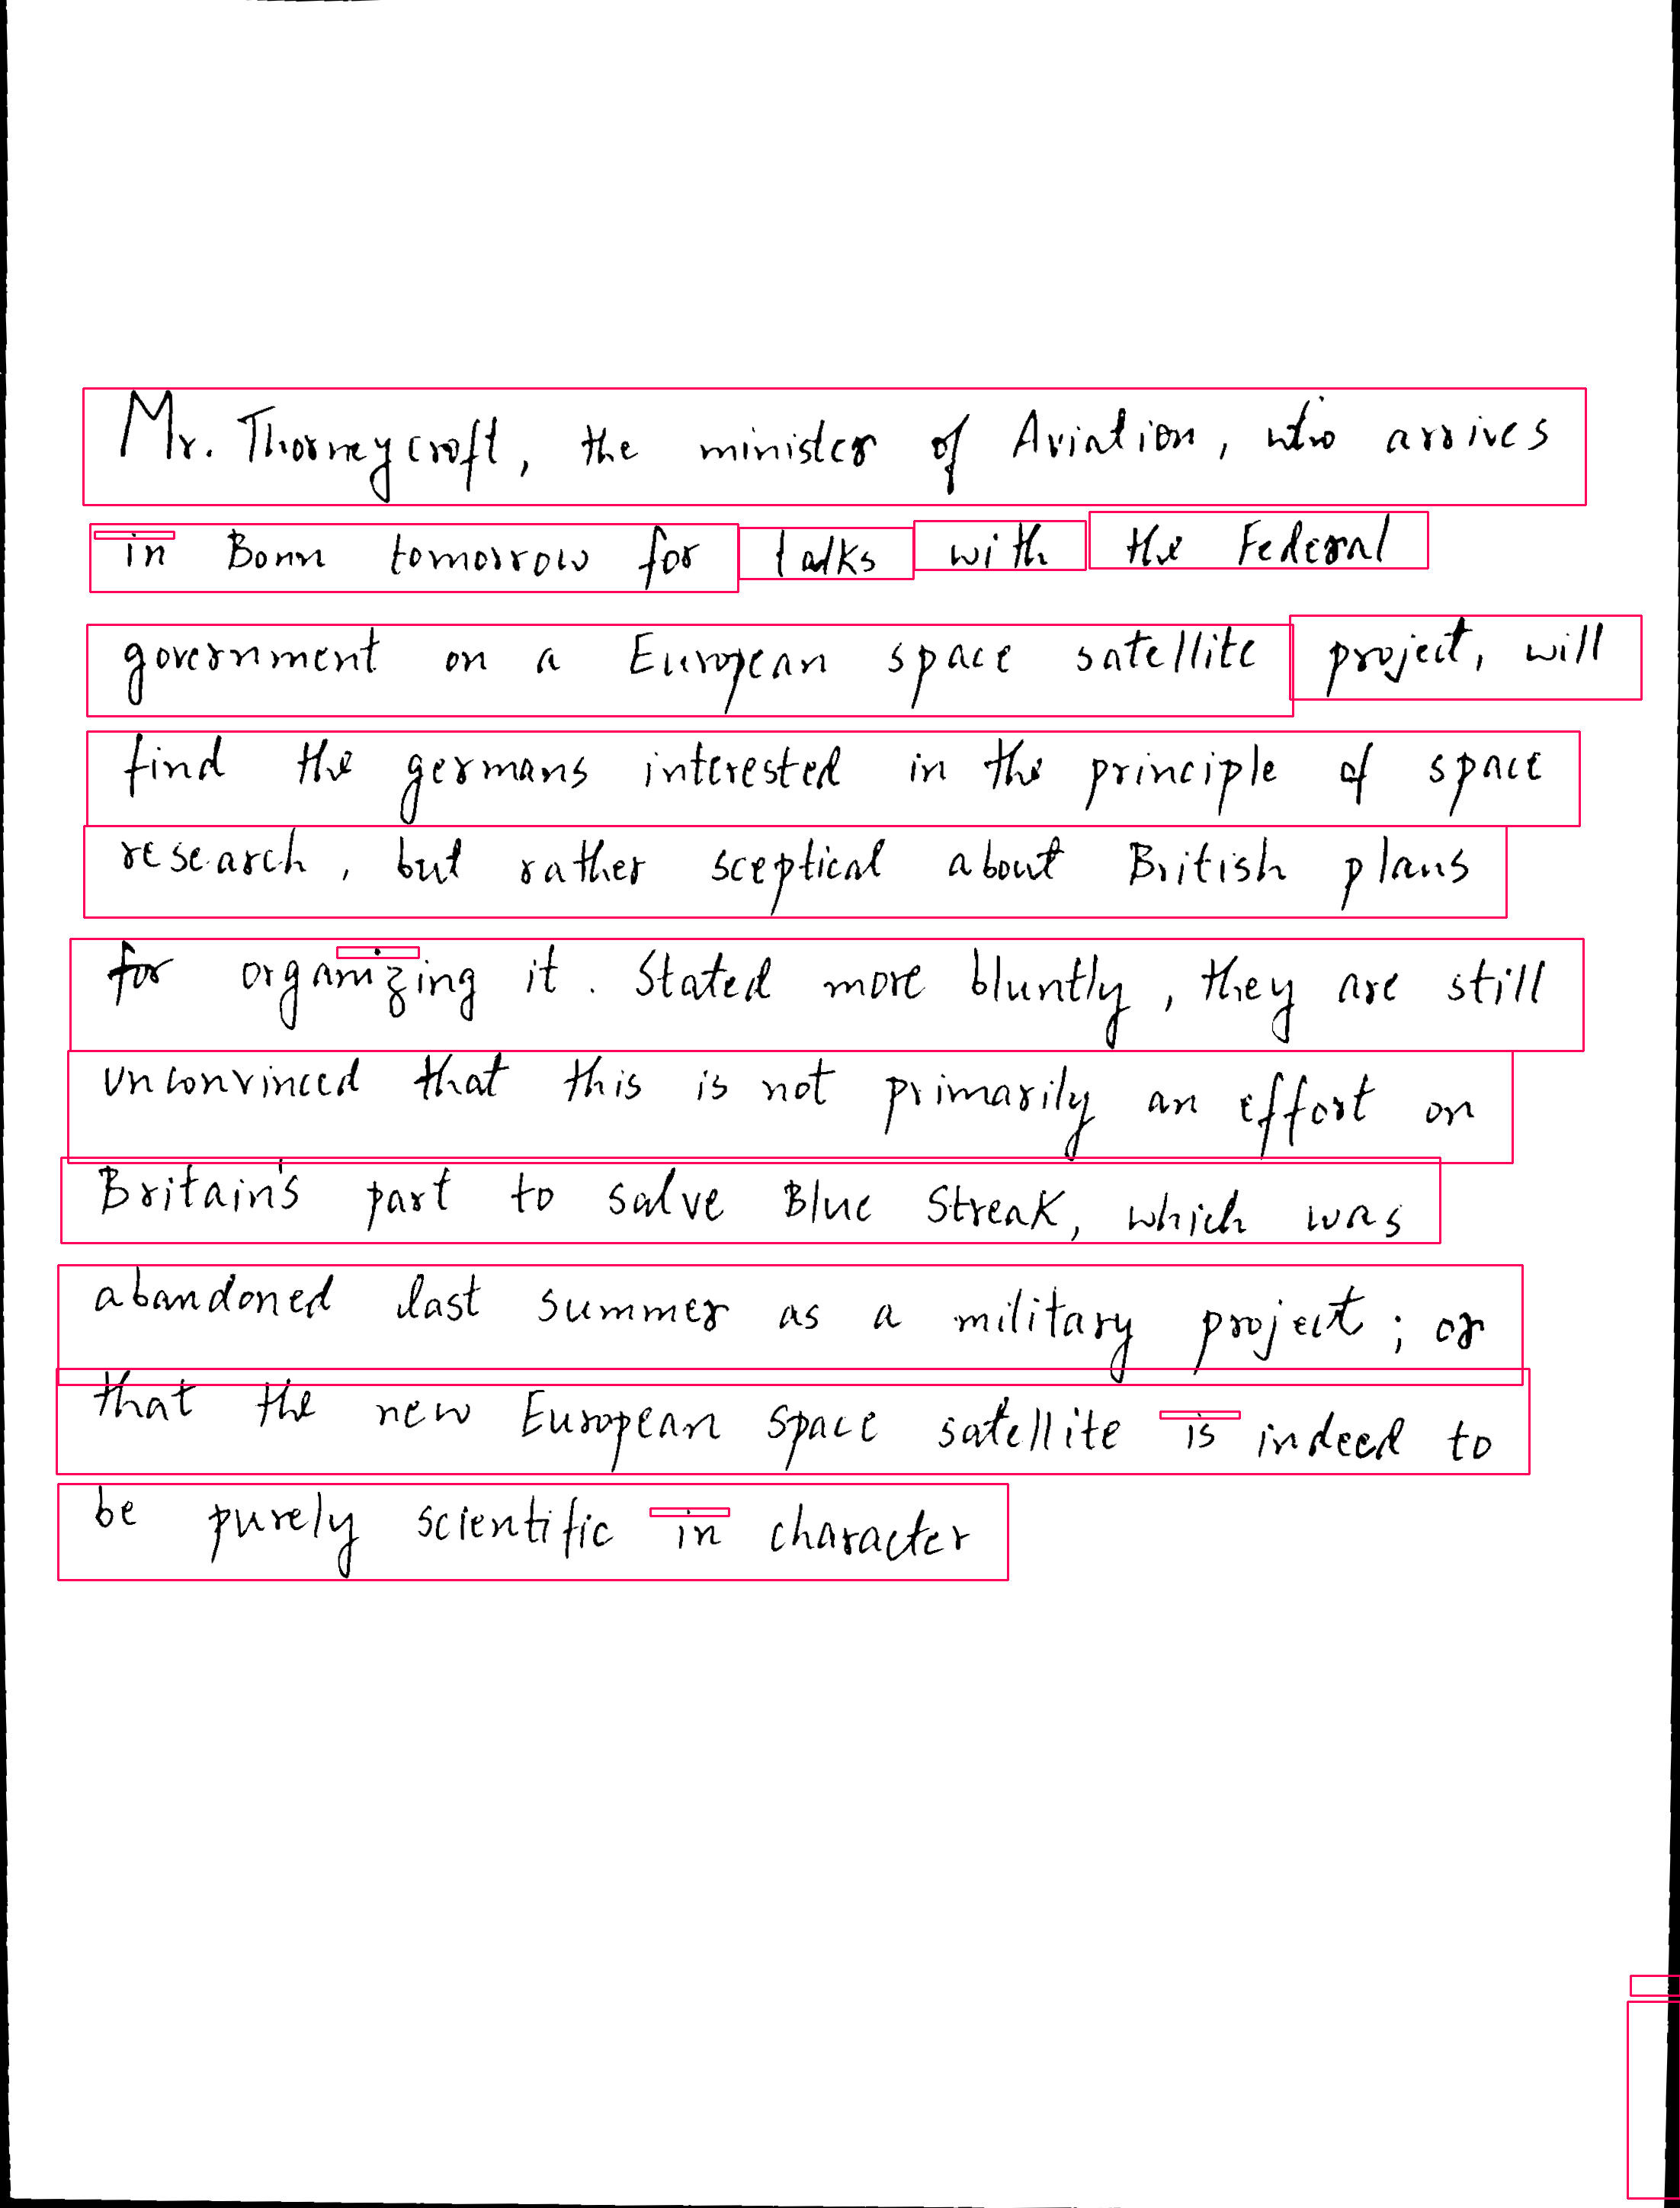

True

In [30]:
cv2.imwrite('final_bounded_box_image.png',image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.imwrite('/content/sent_seg_out.jpg', image)